# Feature Engineering

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [125]:
data_vehiculos=pd.read_csv("vehiculos.csv")
data_vehiculos.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,VIN,drive,size,type,paint_color,county,state,lat,long,posting_date
0,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8.0,gas,57923.0,...,3GTP1VEC4EG551563,NaN,NaN,pickup,white,NaN,al,32.590,-85.4800,2021-05-04T12:31:18-0500
1,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8.0,gas,71229.0,...,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,NaN,al,32.590,-85.4800,2021-05-04T12:31:08-0500
2,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8.0,gas,19160.0,...,3GCPWCED5LG130317,NaN,NaN,pickup,red,NaN,al,32.590,-85.4800,2021-05-04T12:31:25-0500
3,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8.0,gas,41124.0,...,5TFRM5F17HX120972,NaN,NaN,pickup,red,NaN,al,32.590,-85.4800,2021-05-04T10:41:31-0500
4,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6.0,gas,128000.0,...,NaN,rwd,full-size,truck,black,NaN,al,32.592,-85.5189,2021-05-03T14:02:03-0500


**Variables con datos faltantes**

In [126]:
col_NA=[]

for col in data_vehiculos:
    if data_vehiculos[col].isnull().mean()>0:
        col_NA.append(col)

col_NA

['year',
 'manufacturer',
 'model',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'county',
 'lat',
 'long']

**Determinando proporción de faltantes por variable**

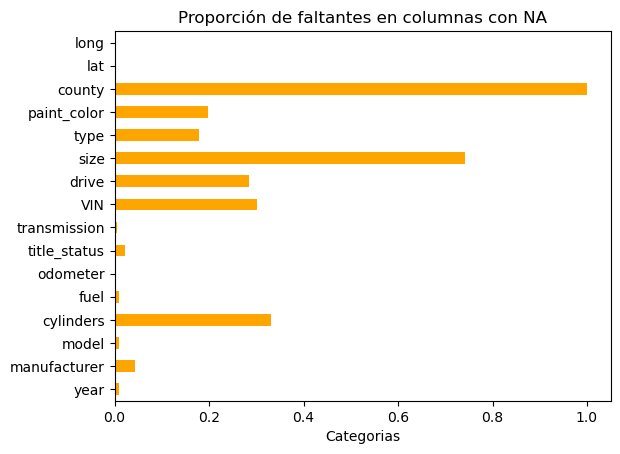

In [127]:
data_vehiculos[col_NA].isnull().mean().plot.barh(color="orange")
plt.title("Proporción de faltantes en columnas con NA")
plt.xlabel("Categorias")
plt.show()

**Clasificando variables con faltantes en numéricas y categóricas**

In [128]:
data_vehiculos.drop(['id','posting_date'], axis=1,inplace=True)

In [129]:
Numericas=[]
categoricas=[]

for col in col_NA:
    if data_vehiculos[col].dtypes=='float64':
        Numericas.append(col)
    else:
        categoricas.append(col)

print("Numericas:")
print(Numericas)
print("")
print("Categoricas")
print(categoricas)

Numericas:
['year', 'cylinders', 'odometer', 'county', 'lat', 'long']

Categoricas
['manufacturer', 'model', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color']


**Imputando variables numéricas**

In [130]:
data_vehiculos[Numericas].isnull().mean()*100

year           0.878462
cylinders     33.061182
odometer       0.289376
county       100.000000
lat            0.186027
long           0.186027
dtype: float64

*Year*

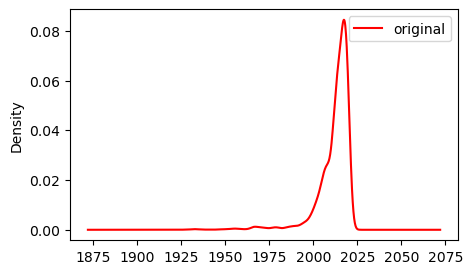

In [131]:
fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111)

data_vehiculos['year'].plot.density(color='red',label='original')
ax.legend()
plt.show()

100.24891657965976
99.36826380944369
99.45186344539947


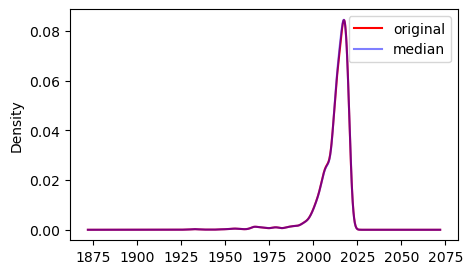

In [132]:
mean_year=data_vehiculos['year'].mean()
median_year=data_vehiculos['year'].median()

data_vehiculos['year_mean']=np.round(data_vehiculos['year'].fillna(mean_year),0)
data_vehiculos['year_median']=np.round(data_vehiculos['year'].fillna(median_year),0)

print(data_vehiculos['year'].var())
print(data_vehiculos['year_mean'].var())
print(data_vehiculos['year_median'].var())


fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111)

data_vehiculos['year'].plot.density(color='red',label='original')
#data_vehiculos['year_mean'].plot.density(color='green',label='mean',alpha=0.5)
data_vehiculos['year_median'].plot.density(color='blue',label='median',alpha=0.5)
ax.legend()
plt.show()

In [133]:
data_vehiculos['year']=np.round(data_vehiculos['year'].fillna(median_year),0)
data_vehiculos.drop(['year_mean','year_median'], axis=1, inplace=True)

*Cylinders*

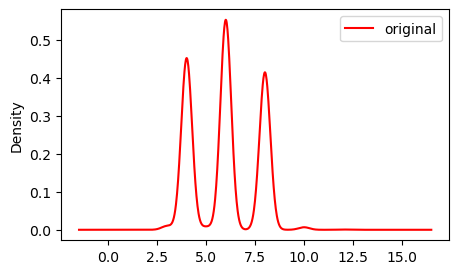

In [134]:
fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111)

data_vehiculos['cylinders'].plot.density(color='red',label='original')
ax.legend()
plt.show()

2.5556215307585366
1.7113261080186777
1.7113261080186777
2.5556215307585366


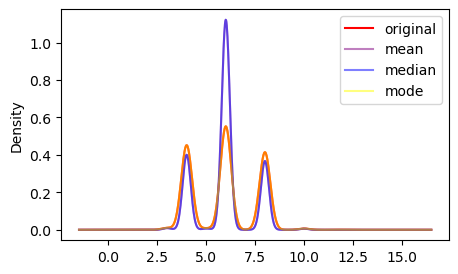

In [135]:
mean_cyl=data_vehiculos['cylinders'].mean()
median_cyl=data_vehiculos['cylinders'].median()
mode_cyl=data_vehiculos['cylinders'].mode()

data_vehiculos['cylinders_mean']=np.round(data_vehiculos['cylinders'].fillna(mean_cyl),0)
data_vehiculos['cylinders_median']=np.round(data_vehiculos['cylinders'].fillna(median_cyl),0)
data_vehiculos['cylinders_mode']=np.round(data_vehiculos['cylinders'].fillna(mode_cyl),0)

print(data_vehiculos['cylinders'].var())
print(data_vehiculos['cylinders_mean'].var())
print(data_vehiculos['cylinders_median'].var())
print(data_vehiculos['cylinders_mode'].var())


fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111)

data_vehiculos['cylinders'].plot.density(color='red',label='original')
data_vehiculos['cylinders_mean'].plot.density(color='purple',label='mean',alpha=0.5)
data_vehiculos['cylinders_median'].plot.density(color='blue',label='median',alpha=0.5)
data_vehiculos['cylinders_mode'].plot.density(color='yellow',label='mode',alpha=0.5)
ax.legend()
plt.show()

In [136]:
data_vehiculos['cylinders']=np.round(data_vehiculos['cylinders'].fillna(6),0)
data_vehiculos.drop(['cylinders_mean','cylinders_median','cylinders_mode'], axis=1, inplace=True)

*Odometer*

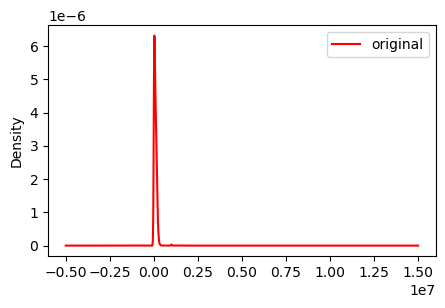

In [137]:
fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111)

data_vehiculos['odometer'].plot.density(color='red',label='original')
ax.legend()
plt.show()

27634954525.995
27554977396.617496
27634954525.995


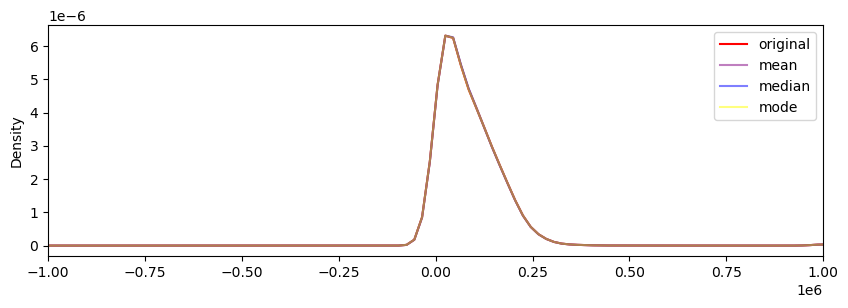

In [138]:
mean_odo=data_vehiculos['odometer'].mean()
median_odo=data_vehiculos['odometer'].median()
mode_odo=data_vehiculos['odometer'].mode()

data_vehiculos['odometer_mean']=np.round(data_vehiculos['odometer'].fillna(mean_odo),0)
data_vehiculos['odometer_median']=np.round(data_vehiculos['odometer'].fillna(median_odo),0)
data_vehiculos['odometer_mode']=np.round(data_vehiculos['odometer'].fillna(mode_odo),0)

print(data_vehiculos['odometer'].var())
print(data_vehiculos['odometer_mean'].var())
print(data_vehiculos['odometer_mode'].var())

fig=plt.figure(figsize=(10,3))
ax=fig.add_subplot(111)

data_vehiculos['odometer'].plot.density(color='red',label='original')
data_vehiculos['odometer_mean'].plot.density(color='purple',label='mean',alpha=0.5)
data_vehiculos['odometer_median'].plot.density(color='blue',label='median',alpha=0.5)
data_vehiculos['odometer_mode'].plot.density(color='yellow',label='mode',alpha=0.5)
plt.xlim(-1000000,1000000)
ax.legend()
plt.show()


In [139]:
data_vehiculos['odometer']=np.round(data_vehiculos['odometer'].fillna(mean_odo),0)
data_vehiculos.drop(['odometer_mean','odometer_median','odometer_mode'], axis=1, inplace=True)

*county*

In [140]:
data_vehiculos['county'].isnull().mean()*100

100.0

In [141]:
data_vehiculos.drop('county', axis=1, inplace=True)

In [142]:
data_vehiculos.shape

(9676, 19)

*lat y long*

In [143]:
columnasCCA=['lat','long']
data_vehiculos.dropna(subset=columnasCCA,axis=0,inplace=True)

In [144]:
data_vehiculos.shape

(9658, 19)

**Imputando variables categóricas**

In [145]:
data_vehiculos[categoricas].isnull().mean()*100

manufacturer     4.431559
model            1.014703
fuel             0.962932
title_status     2.205426
transmission     0.548768
VIN             30.026921
drive           28.494512
size            74.218265
type            17.912611
paint_color     19.724581
dtype: float64

*Manufacturer, model, fuel, title status, transmission*

In [146]:
cols_for_cca=[col for col in categoricas if data_vehiculos[col].isnull().mean()<0.06]
cols_for_cca

['manufacturer', 'model', 'fuel', 'title_status', 'transmission']

In [147]:
data_vehiculos.dropna(subset=cols_for_cca,axis=0,inplace=True)

In [148]:
data_vehiculos.shape

(8883, 19)

*Vin*

In [149]:
data_vehiculos.drop('VIN', axis=1, inplace=True)

In [150]:
data_vehiculos.shape

(8883, 18)

*Drive*

<Axes: xlabel='drive'>

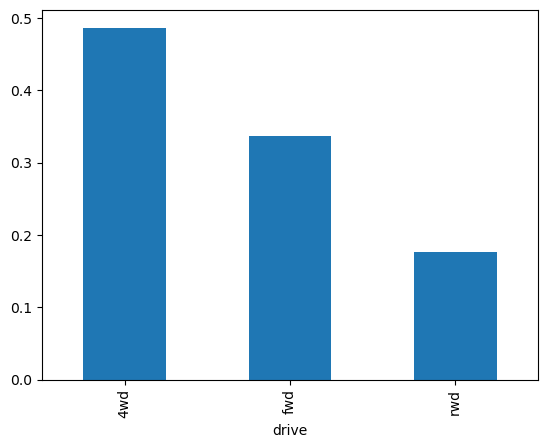

In [151]:
data_vehiculos['drive'].value_counts(normalize=True).plot.bar()

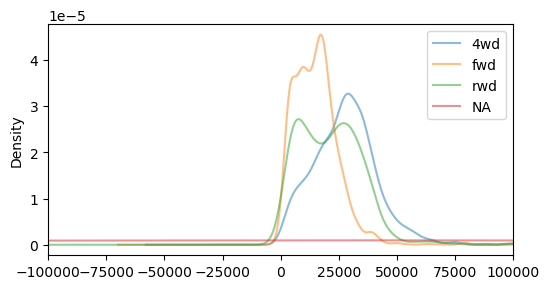

In [152]:
fig=plt.figure(figsize=(6,3))
ax=fig.add_subplot(111)

data_vehiculos[data_vehiculos['drive']=='4wd']['price'].plot(kind='kde',ax=ax,label='4wd',alpha=0.5)
data_vehiculos[data_vehiculos['drive']=='fwd']['price'].plot(kind='kde',ax=ax,label='fwd',alpha=0.5)
data_vehiculos[data_vehiculos['drive']=='rwd']['price'].plot(kind='kde',ax=ax,label='rwd',alpha=0.5)
data_vehiculos[data_vehiculos['drive'].isnull()]['price'].plot(kind='kde',ax=ax,label='NA',alpha=0.5)
plt.xlim(-100000,100000)
ax.legend()
plt.show()


In [153]:
data_vehiculos['drive'].fillna('Missing',inplace=True)

<Axes: xlabel='drive'>

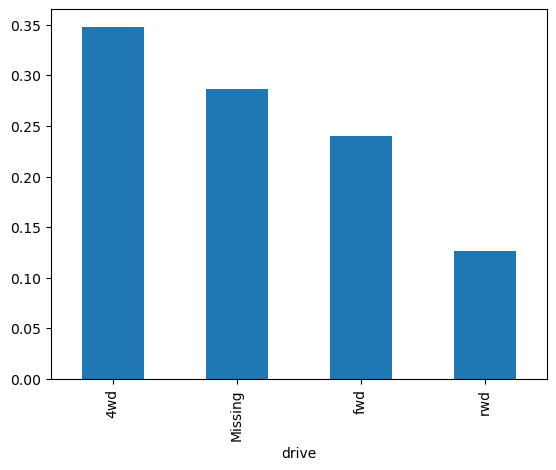

In [154]:
data_vehiculos['drive'].value_counts(normalize=True).plot.bar()

*Size*

<Axes: xlabel='size'>

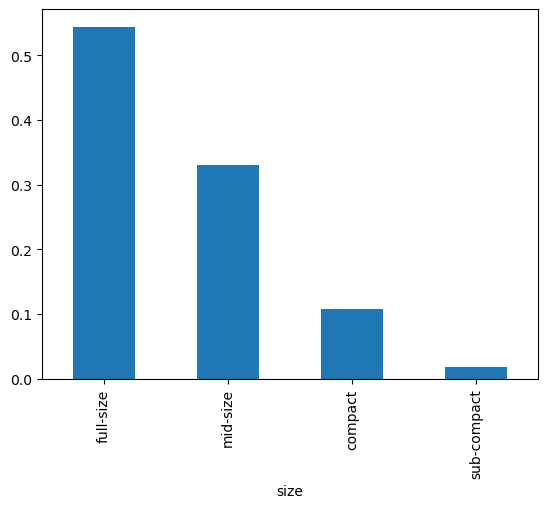

In [155]:
data_vehiculos['size'].value_counts(normalize=True).plot.bar()

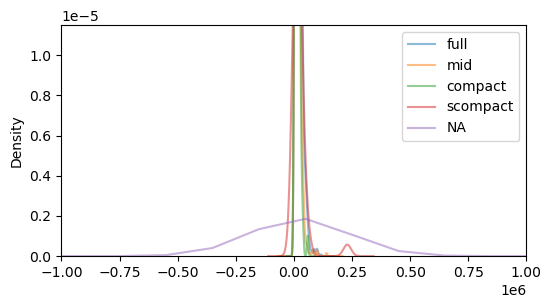

In [156]:
fig=plt.figure(figsize=(6,3))
ax=fig.add_subplot(111)

data_vehiculos[data_vehiculos['size']=='full-size']['price'].plot(kind='kde',ax=ax,label='full',alpha=0.5)
data_vehiculos[data_vehiculos['size']=='mid-size']['price'].plot(kind='kde',ax=ax,label='mid',alpha=0.5)
data_vehiculos[data_vehiculos['size']=='compact']['price'].plot(kind='kde',ax=ax,label='compact',alpha=0.5)
data_vehiculos[data_vehiculos['size']=='sub-compact']['price'].plot(kind='kde',ax=ax,label='scompact',alpha=0.5)
data_vehiculos[data_vehiculos['size'].isnull()]['price'].plot(kind='kde',ax=ax,label='NA',alpha=0.5)
plt.xlim(-1000000,1000000)
plt.ylim(0, 0.00001150)
ax.legend()
plt.show()

<Axes: xlabel='size'>

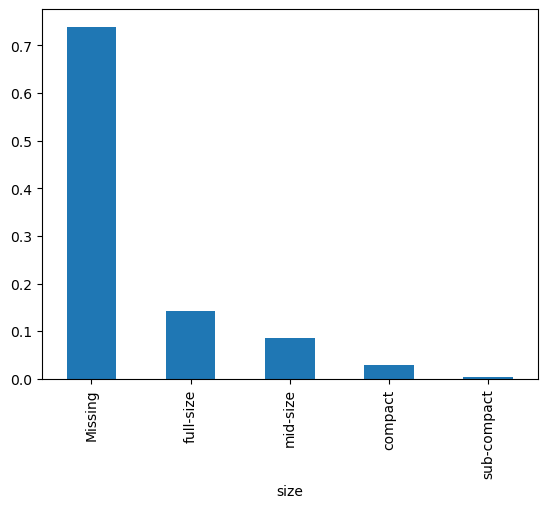

In [157]:
data_vehiculos['size'].fillna('Missing',inplace=True)
data_vehiculos['size'].value_counts(normalize=True).plot.bar()

*Type*

<Axes: xlabel='type'>

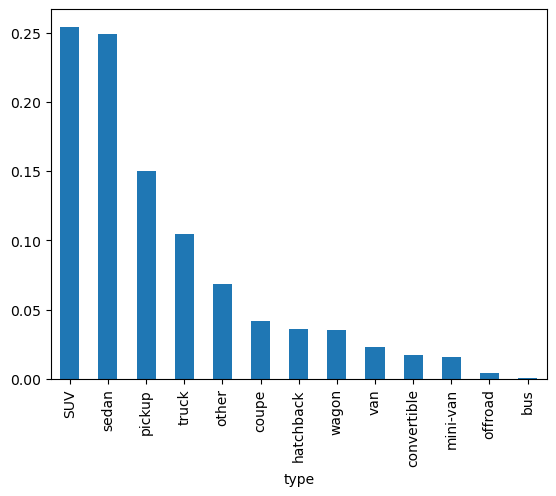

In [158]:
data_vehiculos['type'].value_counts(normalize=True).plot.bar()

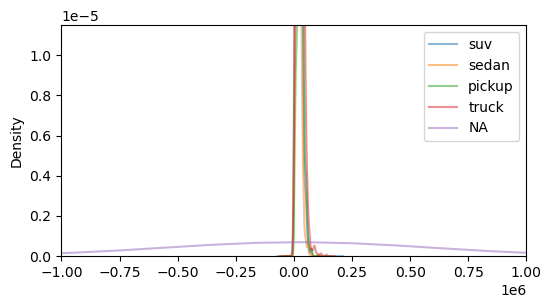

In [159]:
fig=plt.figure(figsize=(6,3))
ax=fig.add_subplot(111)

data_vehiculos[data_vehiculos['type']=='SUV']['price'].plot(kind='kde',ax=ax,label='suv',alpha=0.5)
data_vehiculos[data_vehiculos['type']=='sedan']['price'].plot(kind='kde',ax=ax,label='sedan',alpha=0.5)
data_vehiculos[data_vehiculos['type']=='pickup']['price'].plot(kind='kde',ax=ax,label='pickup',alpha=0.5)
data_vehiculos[data_vehiculos['type']=='truck']['price'].plot(kind='kde',ax=ax,label='truck',alpha=0.5)
data_vehiculos[data_vehiculos['type'].isnull()]['price'].plot(kind='kde',ax=ax,label='NA',alpha=0.5)
plt.xlim(-1000000,1000000)
plt.ylim(0, 0.00001150)
ax.legend()
plt.show()

<Axes: xlabel='type'>

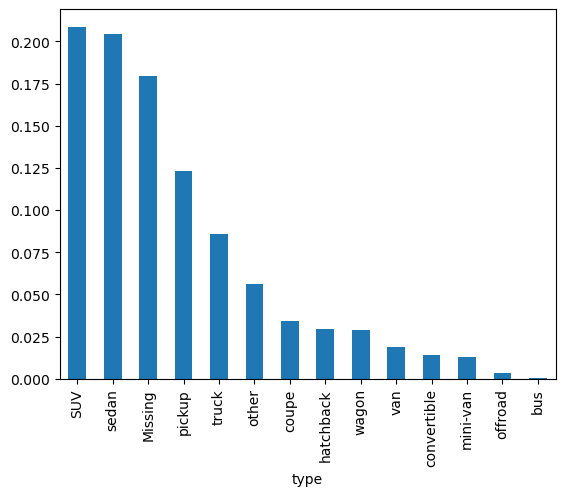

In [160]:
data_vehiculos['type'].fillna('Missing',inplace=True)
data_vehiculos['type'].value_counts(normalize=True).plot.bar()

*Paint color*

<Axes: xlabel='paint_color'>

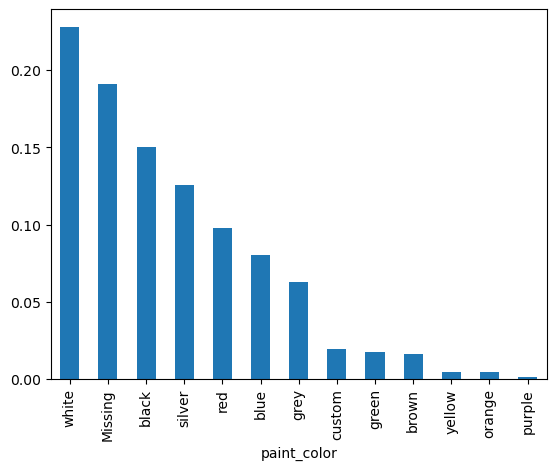

In [161]:
data_vehiculos['paint_color'].fillna('Missing',inplace=True)
data_vehiculos['paint_color'].value_counts(normalize=True).plot.bar()

In [162]:
data_vehiculos.isnull().mean()


region          0.0
price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
size            0.0
type            0.0
paint_color     0.0
state           0.0
lat             0.0
long            0.0
dtype: float64

**Encoding**

In [163]:
Numericas_e=[]
categoricas_e=[]

for col in data_vehiculos.columns:
    if data_vehiculos[col].dtypes in ('float64','int64'):
        Numericas_e.append(col)
    else:
        categoricas_e.append(col)

print("Numericas:")
print(Numericas_e)
print("")
print("Categoricas")
print(categoricas_e)

Numericas:
['price', 'year', 'cylinders', 'odometer', 'lat', 'long']

Categoricas
['region', 'manufacturer', 'model', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']


In [164]:
# en base a la frecuencia codificamos todas las variables categoricas
for col in categoricas_e:
    if(col not in('condition')):
        freq_dict = data_vehiculos[col].value_counts().to_dict()
        data_vehiculos[col] = data_vehiculos[col].map(freq_dict)

In [165]:
# Codificamos el target 'Condition' con laber
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data_vehiculos['condition']=encoder.fit_transform(data_vehiculos['condition'])

**Outliers**

In [166]:
continuas = [col for col in data_vehiculos[Numericas_e] if (data_vehiculos[col].dtypes in ['float64','int64']) and (len(data_vehiculos[col].unique())>30)]
continuas

['price', 'year', 'odometer', 'lat', 'long']

price


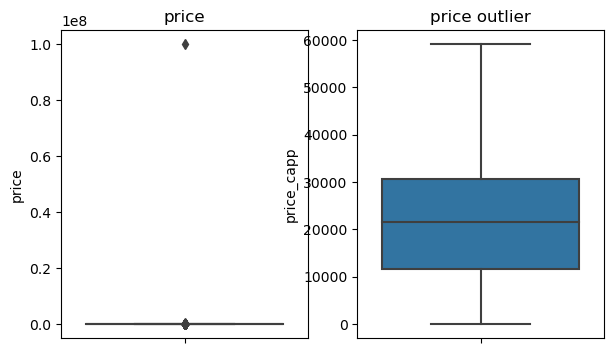

odometer


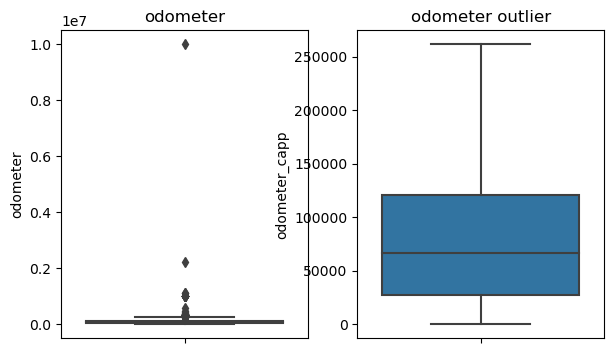

In [167]:
#Se tratará oultiers de Price y Odometer, que son las posibles variables continuas que ayudaran a predecir para el modelo de clasificación
continuas_outliers=['price','odometer']

for col in continuas_outliers:

    IQR=data_vehiculos[col].quantile(0.75)-data_vehiculos[col].quantile(0.25)
    IQR
    LL=data_vehiculos[col].quantile(0.25)-1.5*IQR
    UL=data_vehiculos[col].quantile(0.75)+1.5*IQR

    data_vehiculos[col+'_capp']=np.where(data_vehiculos[col]>UL,UL,np.where(data_vehiculos[col]<LL,LL,data_vehiculos[col]))
    
    print(col)

    plt.figure(figsize=(7,4))

    plt.subplot(121)
    plt.title(col)
    sns.boxplot(y=data_vehiculos[col])

    plt.subplot(122)
    plt.title(col + ' outlier')
    sns.boxplot(y=data_vehiculos[col+'_capp'])
 
   
    plt.show()

In [169]:
data_vehiculos['odometer']=data_vehiculos['odometer_capp']
data_vehiculos['price']=data_vehiculos['price_capp']

data_vehiculos.drop(['odometer_capp','price_capp'],axis=1, inplace=True)


**Transformación de Variables**

In [170]:
def plot_sensisty_qq(df, variable):

    plt.figure(figsize=(6,4))

    plt.subplot(121)
    df[variable].hist(bins=30)
    

    plt.subplot(122)
    stats.probplot(df[variable],dist="norm",plot=plt)

    plt.show()

*Price*

price
price Original


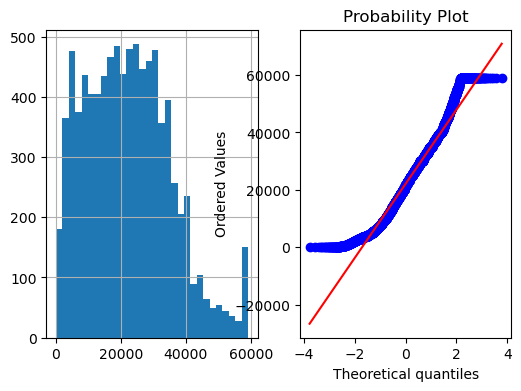

price boxcoc


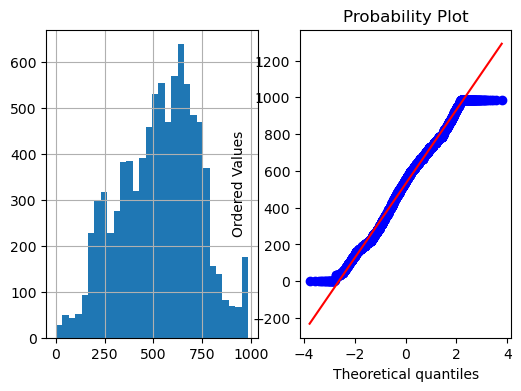

In [172]:
    col='price'
    print(col)
    print(col+" Original")
    plot_sensisty_qq(data_vehiculos,col)

    print(col+" boxcoc")
    if(data_vehiculos[col].min()==0):
        data_vehiculos[col+'_BC'],lmbd=stats.boxcox(data_vehiculos[col]+1)
        plot_sensisty_qq(data_vehiculos,col+'_BC')
    else:
        data_vehiculos[col+'_BC'],lmbd=stats.boxcox(data_vehiculos[col])
        plot_sensisty_qq(data_vehiculos,col+'_BC')

*Odometer*

odometer
odometer Original


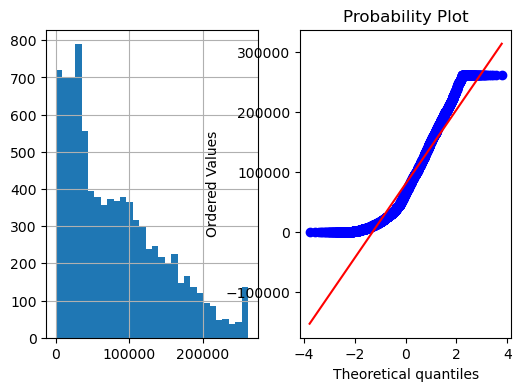

odometer boxcoc


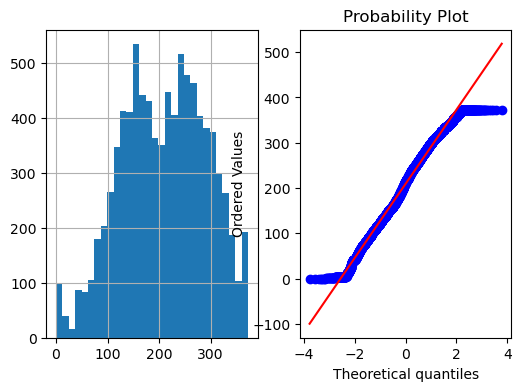

In [171]:
    col='odometer'
    print(col)
    print(col+" Original")
    plot_sensisty_qq(data_vehiculos,col)

    print(col+" boxcoc")
    if(data_vehiculos[col].min()==0):
        data_vehiculos[col+'_BC'],lmbd=stats.boxcox(data_vehiculos[col]+1)
        plot_sensisty_qq(data_vehiculos,col+'_BC')
    else:
        data_vehiculos[col+'_BC'],lmbd=stats.boxcox(data_vehiculos[col])
        plot_sensisty_qq(data_vehiculos,col+'_BC')

In [173]:
data_vehiculos['odometer']=data_vehiculos['odometer_BC']
data_vehiculos['price']=data_vehiculos['price_BC']

data_vehiculos.drop(['odometer_BC','price_BC'],axis=1, inplace=True)

In [174]:
data_vehiculos.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long'],
      dtype='object')

In [179]:
data_vehiculos.to_csv("Vehiculos_Featuring.csv",index=False)

In [ ]:
sns.boxplot(
    x = "condition",
    y = "odometer_capp",
    showmeans=True,  # Show mean with a dot
    data=data_vehiculos
)

# Customize the plot (optional)
plt.xlabel('Vehicle Condition')
plt.ylabel('Price')
plt.title('Distribution of Price by Vehicle Condition')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

# Display the plot
plt.show()

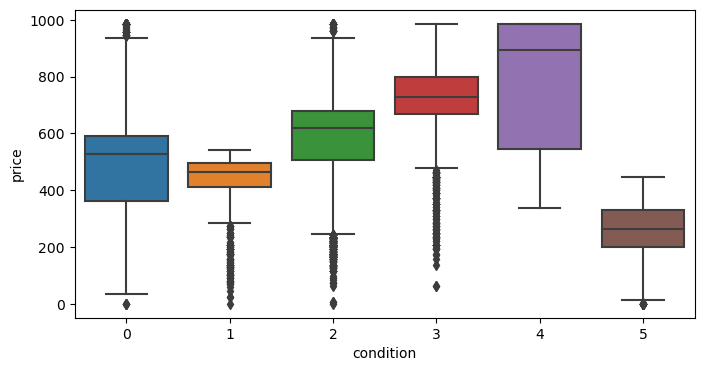

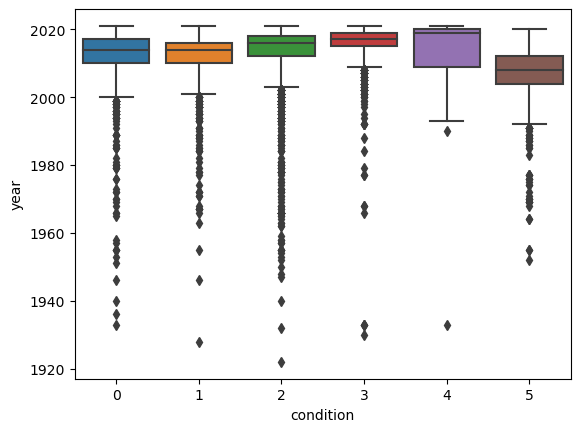

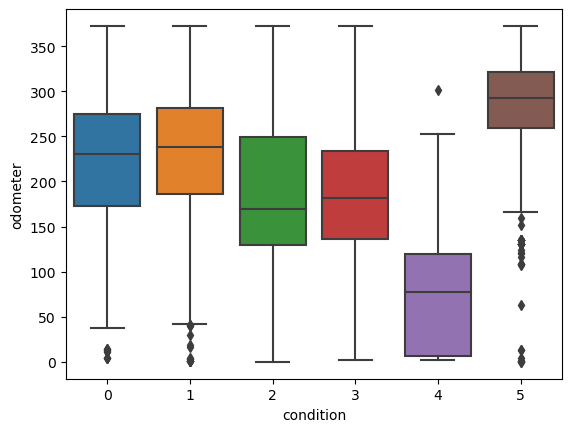

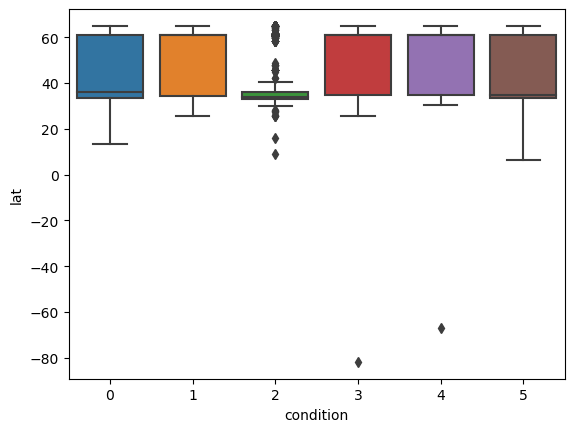

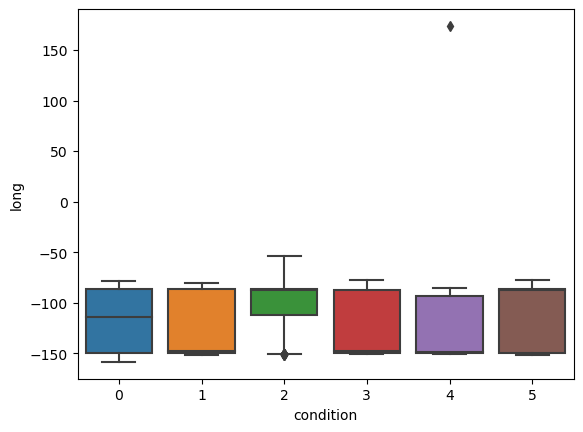

In [177]:
plt.figure(figsize=(8,4))

for col in data_vehiculos[continuas]:
    plot=sns.boxplot(y=data_vehiculos[col], x=data_vehiculos['condition'])
    plt.show()

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# metricas
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score